In [32]:
# vectorized operations and numerical calcs
import numpy as np
# tabular data window dressing and syntax
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# data source
from pydataset import data
# stats calculations
from scipy import stats

# Overview Exercises

Has the network latency gone up since we switched internet service providers?

Question: Is there a difference in network latency since switching internet providers

Null Hypothesis: There is no difference in network latency since switching internet providers

Alt Hypothesis: There is a difference in network latency since switching internet providers

True Positive: There is a difference

True Negative: There is no difference

T1 Error: Claims there is no difference, but there actually is

T2 Error: Claims there is a difference, but there actually isn't
    

Is the website redesign any good?

Question: Does the website resign make an impact on traffic?

Null Hypothesis: the website resign does not make an impact on traffic

Alt Hypothesis: the website resign does make an impact on traffic

True Positive: There is an impact

True Negative: There is no impact

T1 Error: Claims there isn't impact, but there actually is

T2 Error: Claims there impact, but there actually isn't

Is our television ad driving more sales?

Question: Does our tv ad increase sales?

Null Hypothesis: Our tv ad doesn't make a difference in sales

Alt Hypothesis: Our tv ad increases sales

True Positive: The ad increases sales

True Negative: The ad doesn't increase sales

T1 Error: Claims there isn't an increase, there is actually

T2 Error: Claims there is an increase, there isn't actually

# Comparison of Means

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?

In [25]:
# grades of students on second floor
# grades of all students
# i have a continuous variable in grades ==> means test
# across two different categories (means test as opposed to corr)
# the two groups: second floor students (subset)
# versus all students (population)
# subset v population: 1-sample
# non-directional difference: two tailed
# what I want here (presuming appropriate parameters)
# is a two-tailed, one sample t-test

Are adults who drink milk taller than adults who dont drink milk?

In [26]:
# adults that drink milk
# adults that dont drink milk
# two sub groups: milk drinkers vs non milk drinkers
# two independent groups, no overlap ==> two sample
# one-tailed test because we want to know if one is specifcally
# taller than the other height_a > height_b
# a: one tailed, independent t-test

Is the price of gas higher in texas or in new mexico?


In [28]:
# one-tailed: asking specifically if its *higher* in one state
# two-sample: two subgroups of texas and nm

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [29]:
# mean that is different across three different groups
# non-directional, because its across more than two groups
# we would use an anova test

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

Use a .05 level of significance.


In [37]:
# two sample t-test

first_office = pd.Series(np.random.normal(90, 15, 40)) #mean, std_dev, sample
second_office = pd.Series(np.random.normal(100, 20, 50))

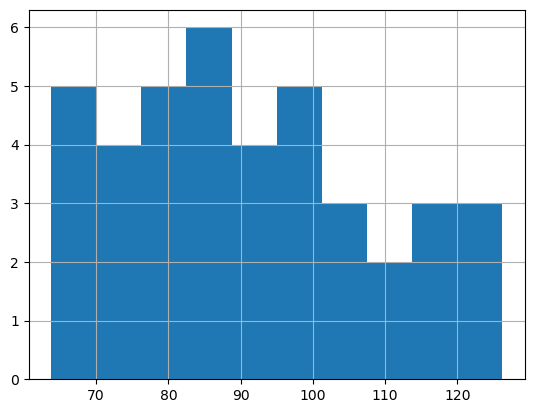

In [38]:
first_office.hist()
plt.show()

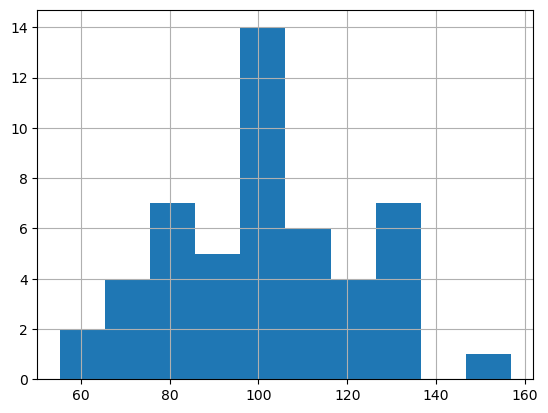

In [39]:
second_office.hist()
plt.show()